# Máster en Data Science - Machine Learning

# Procesamiento de variables: Codificación de variables categóricas y escalado
Autor: Ramón Morillo Barrera

## Dataset: Application data

Voy a llevar un experimento a cabo separando el conjunto de entrenamiento de los datos en entrenamiento y validación para analizar las métricas de los modelos, con el objetivo de detectar casos de overfitting si lo hubiera. En este notebook probaré con distintas variables para decidir que variables seleccionaré para la implementación final de mis modelos.

### Librerías

In [1]:
import sys
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
# pip install category-encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix, calinski_harabasz_score, silhouette_samples

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from boruta import BorutaPy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder, CatBoostEncoder
from sklearn.metrics import classification_report
import lightgbm as lgb

import pickle
from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Funciones

In [2]:
sys.path.append('../src')
import funciones_auxiliares as f_aux
sys.path.remove('../src')

# Constante
seed = 25347823

### Importación de datos

In [3]:
df_loan_train = pd.read_csv("../../data_loan_status/data_split/df_loan_train.csv")
df_loan_test = pd.read_csv("../../data_loan_status/data_split/df_loan_test.csv")

In [4]:
# vuelvo a generar mis listas por tipos de variables
df_loan_bool, df_loan_cat, df_loan_num = f_aux.tipos_vars(df_loan_train,False)

In [5]:
y_train = df_loan_train['TARGET']
X_train = df_loan_train.drop('TARGET', axis=1)
y_test = df_loan_test['TARGET']
X_test = df_loan_test.drop('TARGET', axis=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((246008, 121), (246008,), (61503, 121), (61503,))

### Train-validation split

In [6]:
X_train_complete, X_val_complete, y_train_complete, y_val_complete = train_test_split(df_loan_train.drop('TARGET',axis=1)
                                                                                      ,df_loan_train['TARGET']
                                                                                      ,stratify=df_loan_train['TARGET']
                                                                                      ,test_size=0.3
                                                                                      ,random_state=seed)

In [7]:
X_train_complete.shape, X_val_complete.shape, y_train_complete.shape, y_val_complete.shape

((172205, 121), (73803, 121), (172205,), (73803,))

In [8]:
X_train_complete

,SK_ID_CURR,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,FLOORSMIN_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,YEARS_BUILD_MODE,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_MEDI,LANDAREA_AVG,LANDAREA_MODE,BASEMENTAREA_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,EXT_SOURCE_1,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,WALLSMATERIAL_MODE,APARTMENTS_AVG,APARTMENTS_MODE,APARTMENTS_MEDI,ENTRANCES_MEDI,ENTRANCES_MODE,ENTRANCES_AVG,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,HOUSETYPE_MODE,FLOORSMAX_MODE,FLOORSMAX_AVG,FLOORSMAX_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,NAME_TYPE_SUITE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,CODE_GENDER,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_OWN_REALTY,LIVE_REGION_NOT_WORK_REGION,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,FLAG_PHONE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_8,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
59823,188779,0.0098,0.0099,0.0099,0.0,0.0,0.0,reg oper account,0.0513,0.0504,0.0551,0.2083,0.2083,0.2083,0.7975,0.7920,0.7892,9.0,0.1257,0.1235,0.1264,0.0774,0.0745,0.0745,0.505892,0.0000,0.0000,0.0000,0.00,0.00,0.0000,Panel,0.0619,0.0630,0.0625,0.1379,0.1379,0.1379,0.0615,0.0641,0.0626,block of flats,0.1667,0.1667,0.1667,0.9846,0.9846,0.9846,0.0484,No,Sales staff,0.798137,0.0,1.0,0.0,0.0,2.0,0.0,Family,2.0,0.0,2.0,0.0,0.753615,837000.0,34294.5,3.0,0.0,13,0,Self-employed,Cash loans,N,F,1168452.0,270000.0,1,Commercial associate,Married,House / apartment,0.046220,Incomplete higher,-16408,-1579,-8350.0,-5091,1,1,0,1,Y,0,0,1,1,MONDAY,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124913,380221,0.0210,0.0208,0.0190,0.0,0.0,0.0,Desconocido,0.0761,0.0756,0.0771,0.2083,0.2083,0.2083,0.7648,0.7585,0.7552,9.0,0.0487,0.0482,0.0459,0.0746,0.0763,0.0759,0.505892,0.0036,0.0011,0.0030,0.00,0.00,0.0000,Desconocido,0.0876,0.0840,0.0864,0.1379,0.1379,0.1379,0.0744,0.0731,0.0748,Desconocido,0.1667,0.1667,0.1667,0.9816,0.9816,0.9816,0.0687,Desconocido,Desconocido,0.652897,0.0,0.0,0.0,0.0,1.0,0.0,Unaccompanied,7.0,0.0,7.0,0.0,0.464603,472500.0,25888.5,1.0,0.0,18,0,XNA,Cash loans,N,F,584766.0,112500.0,0,Pensioner,Widow,House / apartment,0.008866,Higher education,-23631,365243,-11325.0,-4991,1,0,0,1,Y,0,0,2,2,WEDNESDAY,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150250,275075,0.0210,0.0208,0.0190,0.0,0.0,0.0,Desconocido,0.0761,0.0756,0.0771,0.2083,0.2083,0.2083,0.7648,0.7585,0.7552,9.0,0.0487,0.0482,0.0459,0.0746,0.0763,0.0759,0.505892,0.0036,0.0011,0.0030,0.00,0.00,0.0000,Desconocido,0.0876,0.0840,0.0864,0.1379,0.1379,0.1379,0.0744,0.0731,0.0748,Desconocido,0.1667,0.1667,0.1667,0.9816,0.9816,0.9816,0.0687,Desconocido,Laborers,0.535276,0.0,0.0,0.0,0.0,1.0,0.0,Family,0.0,0.0,0.0,0.0,0.6859

## Variables Boruta

#### Preprocesamiento

In [9]:
X_train_complete_processed = f_aux.preprocessing(f_aux.feature_selection(X_train_complete), y_train_complete, scale=True).fit_transform(f_aux.feature_selection(X_train_complete), y_train_complete)
X_train_complete_processed

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE,ORGANIZATION_TYPE
59823,0.009117,1.614752,1.252351,0.810200,0.495165,1.164304,1.415009,-0.085596,-0.463231,-0.956591,-1.389774,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.096440,0.080729
124913,0.009117,0.784188,-0.263592,-0.178413,-0.084646,1.164304,-0.035914,-1.742067,2.132034,-1.801088,-1.323447,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.064807,0.080729
150250,0.009117,0.111572,0.897302,-0.605592,0.136974,-0.661867,-0.499778,-0.495414,-0.455427,0.980217,0.887898,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.106055,0.080729
14668,0.009117,0.111572,0.195311,0.431842,-0.028465,-0.030150,0.518960,-0.752037,2.132034,0.134301,0.087994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064807,0.040365
148003,0.009117,1.698731,0.860212,-0.227234,-0.316508,-0.834924,-0.225507,-1.354953,-0.472712,0.341806,-0.869769,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.113512,0.080729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227018,-1.444829,0.385843,1.221568,-0.837488,0.011265,-0.922057,-0.843727,0.840909,-0.491531,1.170691,-0.772269,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.106055,0.105307
196637,0.966895,1.045931,1.246592,4.642600,2.223735,0.427300,4.103513,0.227673,-0.506353,0.128908,-1.028954,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.062455,0.069507
149732,-1.560825,-1.376826,-2.422060,-0.117388,0.467541,1.164304,0.057669,1.603670,-0.453390,0.931677,1.653313,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.096440,0.094004
93413,1.208603,1.621383,1.269524,0.675944,0.041373,-2.237530,0.855638,0.265513,-0.499031,0.398579,-1.676307,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.062455,0.060281


In [10]:
X_val_complete_processed = f_aux.preprocessing(f_aux.feature_selection(X_val_complete), y_val_complete, scale=True).fit_transform(f_aux.feature_selection(X_val_complete), y_val_complete)
X_val_complete_processed

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE,ORGANIZATION_TYPE
207205,-2.090902,-1.527897,-0.111251,-0.091562,0.631578,1.160171,-0.018596,0.366397,2.131843,-0.352296,-0.908834,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064692,0.080728
5697,0.016538,0.113778,-0.063047,-0.846065,-0.761601,-0.050858,-0.779643,-1.827289,2.131843,0.196687,-0.885032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064692,0.040364
40453,0.016538,0.113778,-1.092014,-0.724371,-0.934432,0.558289,-0.815447,1.668248,-0.457868,-1.053743,1.044296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.070588,0.080728
50015,0.526844,0.113778,0.387903,-0.566168,0.676180,1.168648,-0.616086,-0.535043,2.131843,1.379987,1.019832,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064692,0.026909
241001,0.394371,-0.542715,0.896980,-0.237595,0.628790,-0.261577,-0.367897,0.073463,-0.504866,0.954454,-0.904867,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.060559,0.080728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81109,0.016538,-1.512417,-0.895524,-0.773048,-0.243727,1.168648,-0.760957,-1.633144,2.131843,1.282706,-0.742217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064692,0.053433
169023,0.016538,-0.400812,-0.463730,-0.967759,-0.462399,0.854991,-1.009683,0.226905,-0.458031,-1.176909,-0.990160,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.105619,0.084898
96759,0.016538,-1.368132,-2.652456,-0.237595,-0.193860,1.168648,0.104715,-0.032642,-0.459142,0.648389,-0.951150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.105521,0.062645
219226,-0.219875,0.113778,0.308907,-0.237595,-0.038994,-2.256140,-0.131591,1.080551,-0.460111,1.282422,1.606961,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.097226,0.108263


Ahora mismo tengo las variables que Boruta seleccionó, preprocesadas y listas para implantarlas y probar varios modelos para ver si finalmente serán las variables seleccionadas. Igualmente voy a probar con estas variables y las variables recomendadas por la regresión Lasso. 

Boruta seleccionó 16 variables mientras que Lasso seleccionó 45.

### Modelado

In [11]:
%%time
clf = lgb.LGBMClassifier(max_bin= 10, num_leaves= 10)
clf.fit(X_train_complete_processed, y_train_complete)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13902, number of negative: 158303
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 172205, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432478
[LightGBM] [Info] Start training from score -2.432478
CPU times: total: 3.08 s
Wall time: 624 ms


LGBMClassifier(max_bin=10, num_leaves=10)

In [12]:
# Realizar predicciones
pred_test = clf.predict_proba(X_val_complete_processed)
pred_train = clf.predict_proba(X_train_complete_processed)

### AUC datos de train

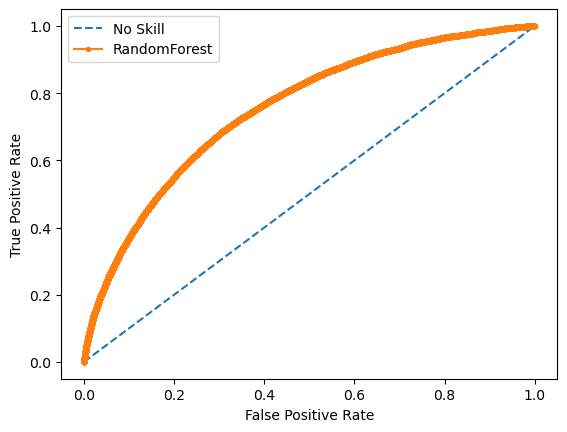

In [13]:
# keep probabilities for the positive outcome only
yhat_train = pred_train[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train_complete, yhat_train)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [14]:
# calculate AUC
auc = roc_auc_score(y_train_complete, yhat_train)
print('AUC: %.3f' % auc)

AUC: 0.754


### AUC datos validation

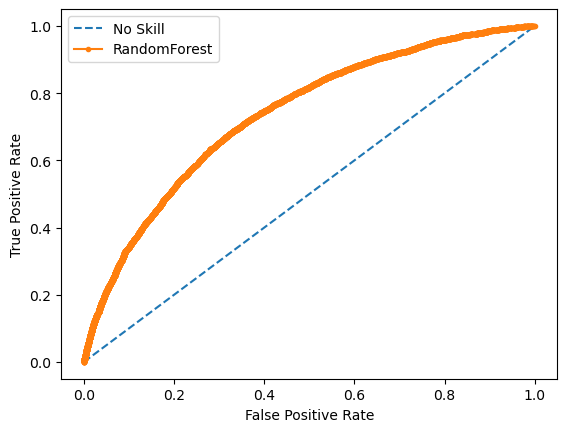

In [15]:
# keep probabilities for the positive outcome only
yhat = pred_test[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val_complete, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [16]:
# calculate AUC
auc = roc_auc_score(y_val_complete, yhat)
print('AUC: %.3f' % auc)

AUC: 0.736


## Variables Lasso

In [18]:
X_train_complete_2, X_val_complete_2, y_train_complete_2, y_val_complete_2 = train_test_split(df_loan_train.drop('TARGET',axis=1)
                                                                                      ,df_loan_train['TARGET']
                                                                                      ,stratify=df_loan_train['TARGET']
                                                                                      ,test_size=0.3
                                                                                      ,random_state=seed)

In [19]:
def feature_selection_lasso(df, add=[]):
    """
    ----------------------------------------------------------------------------------------------------------
    Función feature_selection:
    ----------------------------------------------------------------------------------------------------------
    - Funcionamiento: Recibe un DataFrame y un opcional de columnas extras a incluir. Devuelve un DataFrame
      con solo las columnas seleccionadas, además de las columnas adicionales en caso de haberse introducido.
    - Inputs:
        - df: DataFrame de Pandas del que se seleccionarán las columnas
        - add: argumento opcional en el que se pueden incluir más columnas para seleccionar
    - Return: DataFrame de pandas con las columnas seleccionadas según el feature selection aplicado.
    """
    # Columnas a seleccionar
    selected_columns = [
        'COMMONAREA_MODE','COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MODE',
        'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
        'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI',
        'YEARS_BUILD_AVG', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'BASEMENTAREA_AVG',
        'BASEMENTAREA_MEDI', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG',
        'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MEDI',
        'ENTRANCES_AVG', 'FLOORSMAX_MODE', 'OCCUPATION_TYPE', 'EXT_SOURCE_3',
        'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
        'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE',
        'ORGANIZATION_TYPE', 'FLAG_OWN_CAR', 'CODE_GENDER',
        'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
        'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED',
        'DAYS_ID_PUBLISH',
        'REGION_RATING_CLIENT_W_CITY'
        
    ]
    
    # Si se pasan columnas adicionales, las agregamos a la lista de selección
    if add:
        selected_columns += add
    
    # Filtramos solo las columnas seleccionadas que existen en el DataFrame
    df_new = df[selected_columns]
    
    return df_new
    
##### 

In [20]:
X_train_complete_processed_lasso = f_aux.preprocessing(feature_selection_lasso(X_train_complete_2), y_train_complete_2, scale=True).fit_transform(feature_selection_lasso(X_train_complete_2), y_train_complete_2)
X_train_complete_processed_lasso

,COMMONAREA_MODE,COMMONAREA_MEDI,NONLIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,FLOORSMIN_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,LANDAREA_MEDI,LANDAREA_AVG,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,EXT_SOURCE_1,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,ELEVATORS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,FLOORSMAX_MODE,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE,ORGANIZATION_TYPE
59823,-0.391670,-0.428575,-0.095728,-0.612962,-0.624743,-0.549529,-0.082223,0.527534,0.529471,1.324486,1.312589,-0.128334,-0.120481,0.009117,-0.304453,-0.259210,-0.356902,-0.078199,-0.082124,-0.265020,1.614752,0.264117,0.254469,1.252351,0.810200,0.495165,1.164304,1.415009,-0.463231,-1.389774,-2.052791,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.096440,0.080729
124913,-0.169743,-0.167768,-0.095728,-0.150961,-0.148826,-0.159083,-0.082223,0.014749,0.014555,-0.142995,-0.142116,-0.094391,-0.094012,0.009117,-0.229525,-0.236654,-0.356902,-0.078199,-0.082124,-0.265020,0.784188,2.442683,2.413923,-0.263592,-0.178413,-0.084646,1.164304,-0.035914,2.132034,-1.323447,-0.060114,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.064807,0.080729
150250,-0.169743,-0.167768,-0.095728,-0.150961,-0.148826,-0.159083,-0.082223,0.014749,0.014555,-0.142995,-0.142116,-0.094391,-0.094012,0.009117,-0.229525,-0.236654,-0.356902,-0.078199,-0.082124,-0.265020,0.111572,-0.607309,-0.609312,0.897302,-0.605592,0.136974,-0.661867,-0.499778,-0.455427,0.887898,-0.060114,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.106055,0.080729
14668,-0.169743,-0.167768,-0.095728,-0.150961,-0.148826,-0.159083,-0.082223,0.014749,0.014555,-0.142995,-0.142116,-0.094391,-0.094012,0.009117,-0.229525,-0.236654,-0.356902,-0.078199,-0.082124,-0.265020,0.111572,-0.607309,-0.609312,0.195311,0.431842,-0.028465,-0.030150,0.518960,2.132034,0.087994,-0.060114,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064807,0.040365
148003,-0.169743,-0.167768,-0.095728,-0.150961,-0.148826,-0.159083,-0.082223,0.014749,0.014555,-0.142995,-0.142116,-0.094391,-0.094012,0.009117,-0.229525,-0.236654,-0.356902,-0.078199,-0.082124,-0.265020,1.698731,0.699830,0.686360,0.860212,-0.227234,-0.316508,-0.834924,-0.225507,-0.472712,-0.869769,-0.060114,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.113512,0.080729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227018,-0.169743,-0.167768,-0.095728,-0.150961,-0.148826,-0.159083,-0.082223,0.014749,0.014555,-0.142995,-0.142116,-0.094391,-0.094012,-1.444829,-0.229525,-0.236654,-0.356902,-0.078199,-0.082124,-0.265020,0.385843,-0.607309,-0.609312,1.221568,-0.837488,0.011265,-0.922057,-0.843727,-0.491531,-0.772269,-0.060114,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.106055,0.105307
196637,0.466773,0.411272,-0.

In [21]:
X_val_complete_processed_lasso = f_aux.preprocessing(feature_selection_lasso(X_val_complete_2), y_val_complete, scale=True).fit_transform(feature_selection_lasso(X_val_complete), y_val_complete)
X_val_complete_processed_lasso

,COMMONAREA_MODE,COMMONAREA_MEDI,NONLIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,FLOORSMIN_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,LANDAREA_MEDI,LANDAREA_AVG,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,EXT_SOURCE_1,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,ELEVATORS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,FLOORSMAX_MODE,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE,ORGANIZATION_TYPE
207205,-0.163132,-0.160918,-0.094366,-0.150848,-0.148351,-0.158830,-0.079991,0.010815,0.010314,-0.139337,-0.138582,-0.093627,-0.093292,-2.090902,-0.232301,-0.241108,-0.353239,-0.079260,-0.082848,-0.261410,-1.527897,-0.613552,-0.615459,-0.111251,-0.091562,0.631578,1.160171,-0.018596,2.131843,-0.908834,-0.065065,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064692,0.080728
5697,-0.223036,-0.259911,-0.094366,-1.171249,-1.172081,-1.126456,-1.896547,-1.673105,-1.676581,-0.881866,-0.885773,-0.542005,-0.535418,0.016538,-0.182378,-0.131871,-0.353239,-0.568428,-0.573391,-1.450153,0.113778,-0.176834,-0.182557,-0.063047,-0.846065,-0.761601,-0.050858,-0.779643,2.131843,-0.885032,-0.065065,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064692,0.040364
40453,-0.580157,0.453284,-0.094366,0.524526,0.505802,0.422449,1.964452,1.167923,1.170054,0.878827,0.871650,0.418272,0.427517,0.016538,-0.230221,-0.263779,0.880441,-0.079260,0.898239,1.322945,0.113778,-0.613552,-0.615459,-1.092014,-0.724371,-0.934432,0.558289,-0.815447,-0.457868,1.044296,-0.065065,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.070588,0.080728
50015,-0.163132,-0.160918,-0.094366,-0.150848,-0.148351,-0.158830,-0.079991,0.010815,0.010314,-0.139337,-0.138582,-0.093627,-0.093292,0.526844,-0.232301,-0.241108,-0.353239,-0.079260,-0.082848,-0.261410,0.113778,2.006755,1.981956,0.387903,-0.566168,0.676180,1.168648,-0.616086,2.131843,1.019832,-0.065065,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064692,0.026909
241001,-0.163132,-0.160918,-0.094366,-0.150848,-0.148351,-0.158830,-0.079991,0.010815,0.010314,-0.139337,-0.138582,-0.093627,-0.093292,0.394371,-0.232301,-0.241108,-0.353239,-0.079260,-0.082848,0.134203,-0.542715,0.696602,0.683249,0.896980,-0.237595,0.628790,-0.261577,-0.367897,-0.504866,-0.904867,-0.065065,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.060559,0.080728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81109,-0.163132,-0.160918,-0.094366,-0.150848,-0.148351,-0.158830,-0.079991,0.010815,0.010314,-0.139337,-0.138582,-0.093627,-0.093292,0.016538,-0.232301,-0.241108,-0.353239,-0.079260,-0.082848,-0.261410,-1.512417,1.570037,1.549054,-0.895524,-0.773048,-0.243727,1.168648,-0.760957,2.131843,-0.742217,-0.065065,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064692,0.053433
169023,-0.163132,-0.160918,-0.0943

### Modelado

In [22]:
%%time
clf_2 = lgb.LGBMClassifier(max_bin= 10, num_leaves= 10)
clf_2.fit(X_train_complete_processed_lasso, y_train_complete_2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13902, number of negative: 158303
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 172205, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432478
[LightGBM] [Info] Start training from score -2.432478
CPU times: total: 5.28 s
Wall time: 1 s


LGBMClassifier(max_bin=10, num_leaves=10)

In [23]:
# Realizar predicciones
pred_test_lasso = clf_2.predict_proba(X_val_complete_processed_lasso)
pred_train_lasso = clf_2.predict_proba(X_train_complete_processed_lasso)

### AUC datos de train

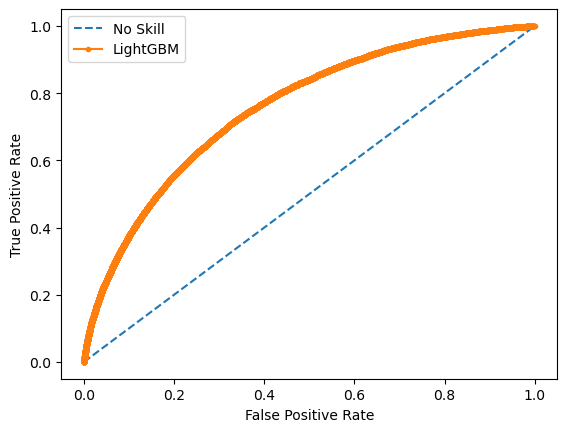

In [32]:
# keep probabilities for the positive outcome only
yhat_train_lasso = pred_train_lasso[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train_complete_2, yhat_train_lasso)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LightGBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [25]:
# calculate AUC
auc = roc_auc_score(y_train_complete_2, yhat_train_lasso)
print('AUC: %.3f' % auc)

AUC: 0.757


### AUC datos de validación

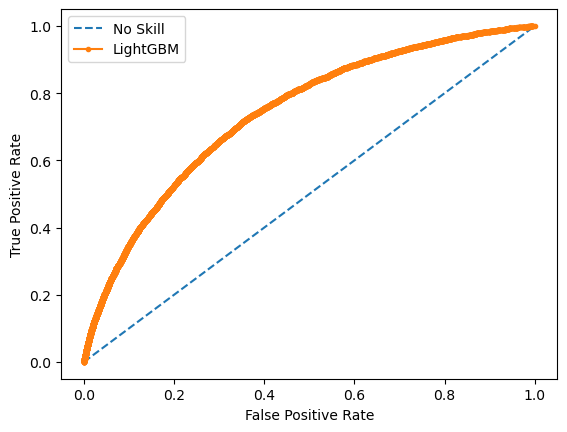

In [33]:
# keep probabilities for the positive outcome only
yhat_lasso = pred_test_lasso[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val_complete_2, yhat_lasso)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LightGBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [27]:
# calculate AUC
auc = roc_auc_score(y_val_complete_2, yhat_lasso)
print('AUC: %.3f' % auc)

AUC: 0.740


## Conclusión

Después de este experimento, en el que hemos analizado el mismo modelo con las variables de Boruta y las variables de Lasso, observamos que el modelo no mejora considerablemente. Esto ocurre porque las variables adicionales que se han añadido no proporcionan explicabilidad ni aportan información relevante a la hora de clasificar a un cliente según si tuviera o no dificultad en el pago del préstamo.

Es por ello y debido a la justificación expuesta que me quedaré únicamente con las variables que ya tenía anteriormente seleccionadas para la realizar mis modelos. Con esto ganaré en capacidad computacional sin sacrificar la explicabilidad de mi modelo debido a que las variables más relevantes estarán incluidas en los mismos.